In [1]:
# importing dependencies here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

############################################# scikit Learn ###############################

# data split and transformation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler

# pipeline
from sklearn.pipeline import make_pipeline

# model and its evaluation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

###########################################################################################

# plot
from scipy import stats

# saving the model
from joblib import dump



In [2]:
# reading the input file
fish_data = pd.read_csv("testfish.csv")

In [3]:
# checking the first 5 records
fish_data.head()

,id,Fish,Current Price,Price1,Price2,Avarage Wind Speed,Doller Rate,Fuel Price
0,1,Salaya,180.56,213.25,134.31,13.9,197.8,144.0
1,2,Salaya,180.00,217.50,142.53,13.4,198.8,159.0
2,3,Salaya,400.10,209.00,122.03,13.2,199.1,159.0
3,4,Salaya,250.52,245.98,143.77,12.5,199.2,248.5
4,5,Salaya,280.05,248.90,158.39,9.8,200.0,248.0


In [4]:
# checking the data types
fish_data.dtypes

id                      int64
Fish                   object
Current Price         float64
Price1                float64
Price2                float64
Avarage Wind Speed    float64
Doller Rate           float64
Fuel Price            float64
dtype: object

In [5]:
# checking for missing values
fish_data.isnull().sum()

id                    0
Fish                  0
Current Price         0
Price1                0
Price2                0
Avarage Wind Speed    0
Doller Rate           0
Fuel Price            0
dtype: int64

In [6]:
# checking the stats
fish_data.describe()

,id,Current Price,Price1,Price2,Avarage Wind Speed,Doller Rate,Fuel Price
count,72.00000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,36.50000,697.114306,641.209167,592.569167,10.633333,229.842500,287.291667
std,20.92845,318.669834,333.756498,349.770080,2.278374,55.181164,120.668290
min,1.00000,180.000000,198.320000,122.030000,6.400000,197.800000,144.000000
25%,18.75000,450.470000,382.582500,373.315000,9.225000,199.175000,225.750000
50%,36.50000,654.790000,624.815000,529.625000,10.450000,201.380000,248.000000
75%,54.25000,905.412500,806.657500,650.850000,12.675000,219.572500,350.000000
max,72.00000,1480.000000,1360.000000,1399.020000,13.900000,365.000000,520.000000


In [7]:
# checking for correlations
corr = fish_data.corr()
corr.style.background_gradient(cmap="ocean")

,id,Current Price,Price1,Price2,Avarage Wind Speed,Doller Rate,Fuel Price
id,1,0.823542,0.704132,0.66608,-0.112185,0.126447,0.154004
Current Price,0.823542,1,0.743606,0.692199,-0.121169,0.374572,0.321507
Price1,0.704132,0.743606,1,0.924959,0.0111146,0.0578488,0.022261
Price2,0.66608,0.692199,0.924959,1,0.0435875,0.000306287,-0.0136703
Avarage Wind Speed,-0.112185,-0.121169,0.0111146,0.0435875,1,-0.422893,-0.573068
Doller Rate,0.126447,0.374572,0.0578488,0.000306287,-0.422893,1,0.900355
Fuel Price,0.154004,0.321507,0.022261,-0.0136703,-0.573068,0.900355,1


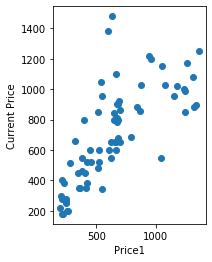

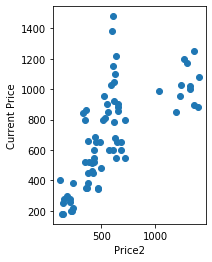

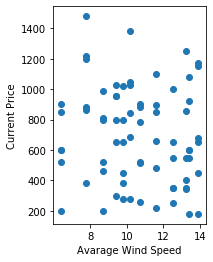

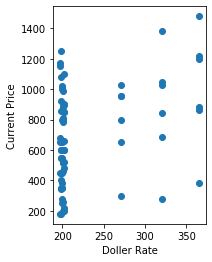

In [8]:
# checking for linear relationship between features and the target variable

numerical = ["Price1", "Price2", "Avarage Wind Speed", "Doller Rate"]

for feature in numerical:
    plt.subplot(1, 2, 1)
    plt.scatter(x=fish_data[feature], y=fish_data["Current Price"])
    plt.xlabel(feature)
    plt.ylabel("Current Price")
    plt.show()

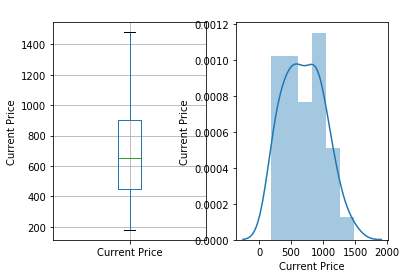

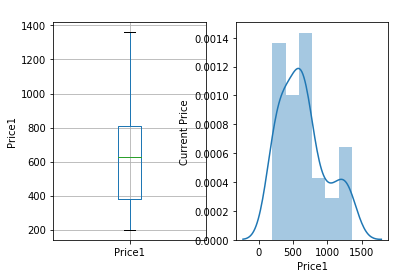

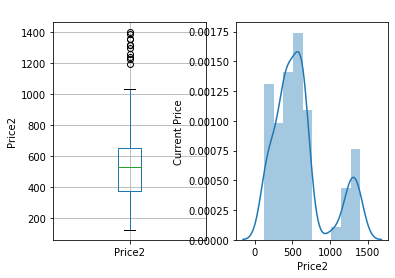

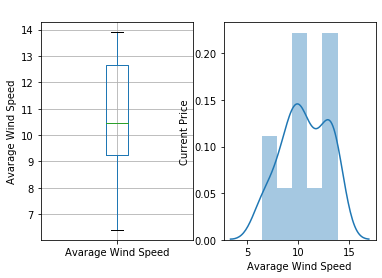

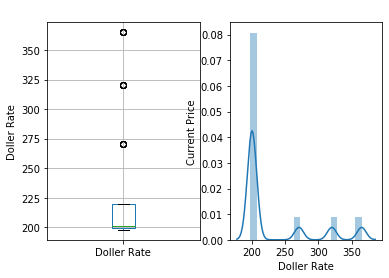

In [9]:
# checking for outliers and distribution

numerical = ["Current Price", "Price1", "Price2", "Avarage Wind Speed", "Doller Rate"]

for feature in numerical:

    plt.subplot(1, 2, 1)
    fig = fish_data.boxplot(column=feature)
    fig.set_title(" ")
    fig.set_ylabel(feature)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(fish_data[feature])
    fig.set_ylabel("Current Price")
    fig.set_xlabel(feature)

    plt.show()

In [10]:
# finding the outliers
for col in numerical:
    df = fish_data[col]
    df_Q1 = df.quantile(0.25)
    df_Q3 = df.quantile(0.75)
    df_IQR = df_Q3 - df_Q1
    df_lowerend = df_Q1 - (1.5 * df_IQR)
    df_upperend = df_Q3 + (1.5 * df_IQR)

    df_outliers = df[(df < df_lowerend) | (df > df_upperend)]
    print(df_outliers)

Series([], Name: Current Price, dtype: float64)
Series([], Name: Price1, dtype: float64)
48    1294.17
49    1399.02
50    1356.19
51    1319.44
52    1314.00
54    1193.75
55    1390.00
56    1353.75
57    1228.75
58    1237.50
59    1259.60
Name: Price2, dtype: float64
Series([], Name: Avarage Wind Speed, dtype: float64)
9     270.85
10    320.22
11    365.00
21    270.85
22    320.22
23    365.00
33    270.85
34    320.22
35    365.00
45    270.85
46    320.22
47    365.00
57    270.85
58    320.22
59    365.00
69    270.85
70    320.22
71    365.00
Name: Doller Rate, dtype: float64


In [11]:
# dropping the outlier at row # 57
fish_data = fish_data.drop([57])

In [12]:
# dropping the outlier at row # 58
fish_data = fish_data.drop([58])

In [13]:
# dropping the outlier at row # 59
fish_data = fish_data.drop([59])

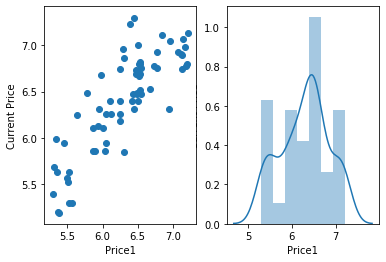

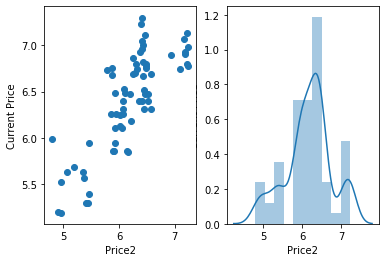

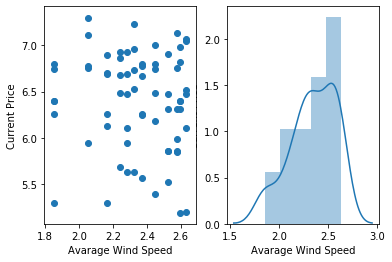

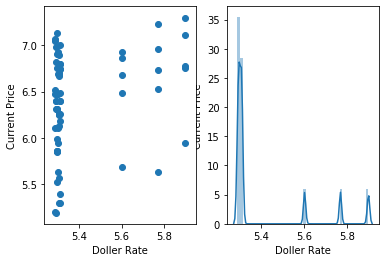

In [14]:
# rechecking the linear relationships and distributions

numerical = ["Price1", "Price2", "Avarage Wind Speed", "Doller Rate"]

for feature in numerical:

    plt.subplot(1, 2, 2)
    fig = sns.distplot(np.log(fish_data[feature]))
    fig.set_ylabel("Current Price")
    fig.set_xlabel(feature)

    plt.subplot(1, 2, 1)
    plt.scatter(x=np.log(fish_data[feature]), y=np.log(fish_data["Current Price"]))
    plt.xlabel(feature)
    plt.ylabel("Current Price")
    plt.show()

    plt.show()

Balaya       12
Hurulla      12
Salaya       12
Kelawalla    12
Paraw        12
Thora         9
Name: Fish, dtype: int64


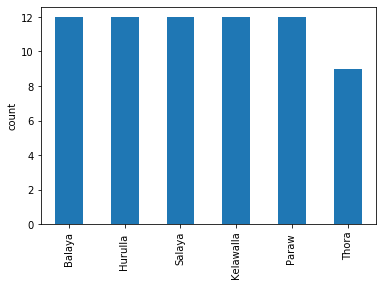

In [15]:
# checking the categorical feature - Species
print(fish_data["Fish"].value_counts())
fish_data["Fish"].value_counts().plot(kind="bar")
plt.ylabel("count")
plt.show()

In [16]:
# checking for collinerity between the 3 length variables
fish_data[["Price1", "Price2", "Avarage Wind Speed", "Doller Rate"]].corr()

,Price1,Price2,Avarage Wind Speed,Doller Rate
Price1,1.000000,0.927013,0.046686,-0.027646
Price2,0.927013,1.000000,0.107948,-0.154749
Avarage Wind Speed,0.046686,0.107948,1.000000,-0.401122
Doller Rate,-0.027646,-0.154749,-0.401122,1.000000


In [17]:
fish_data[["Price1", "Price2"]].head(10)

,Price1,Price2
0,213.25,134.31
1,217.50,142.53
2,209.00,122.03
3,245.98,143.77
4,248.90,158.39
5,250.00,231.03
6,260.75,224.03
7,244.80,215.33
8,198.32,236.55
9,203.45,180.00


In [18]:
fish_data = fish_data.drop(["Price2"], axis=1)

In [19]:
#model creation
# dividing the data into features and target variable
X = fish_data.drop("Current Price", axis=1)
y = fish_data["Current Price"]


In [20]:
# for encoding the categorical feature - species and for transforming the numerical features using log transformation

numerical = ["Price1", "Avarage Wind Speed", "Doller Rate", "Fuel Price"]
categorical = ["Fish"]

preprocesser = ColumnTransformer(
    transformers=[
        ("one_hot_encoder", OneHotEncoder(), categorical),
        ("log_transformer", FunctionTransformer(np.log, validate=False), numerical,),
    ],
    remainder="passthrough",
)

In [21]:
# splitting the data into train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [22]:
#Linner Regration
# building the pipeline
lr_pipe = make_pipeline(
    preprocesser,
    TransformedTargetRegressor(
        regressor=LinearRegression(), func=np.log, inverse_func=np.exp
    ),
)

In [23]:
# fitting the data
lr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  ['Fish']),
                                

In [24]:
# predicting
y_predict = lr_pipe.predict(X_test)

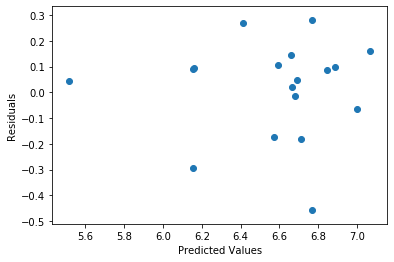

In [25]:
# Residual Plot
plt.scatter(np.log(y_predict), np.log(y_test) - np.log(y_predict))
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

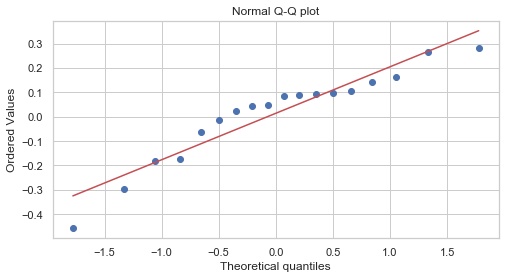

In [26]:
# Normal Q-Q plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
stats.probplot(np.log(y_test) - np.log(y_predict), dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

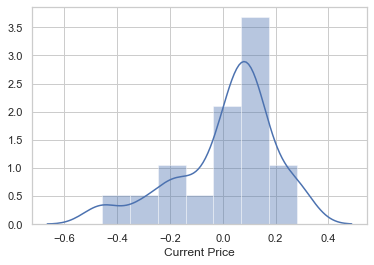

In [27]:
# distplot
sns.distplot(np.log(y_test) - np.log(y_predict))

In [28]:
# Test MSE and R2
print(f"\nLinear Regression Test MSE: {mean_squared_error(y_test, y_predict)}")
print(f"Linear Regression Test Accuracy (R-Squared): {r2_score(y_test, y_predict)}")


# cross validation score
cv_score = np.mean(
    (cross_val_score(lr_pipe, X, y, cv=5, scoring="neg_mean_squared_error")) * -1
)
print(f"\nLinear Regression Cross Validation Score: {cv_score}")


Linear Regression Test MSE: 19735.133364469635
Linear Regression Test Accuracy (R-Squared): 0.7484837776274575


ValueError: Found unknown categories ['Salaya'] in column 0 during transform

In [29]:
#Lasso 
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# building lasso pipeline
lasso_pipe = make_pipeline(preprocesser, StandardScaler(), Lasso())

parameters = {
    "lasso__alpha": [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40]
}

lasso_regressor = TransformedTargetRegressor(
    GridSearchCV(lasso_pipe, parameters, scoring="neg_mean_squared_error", cv=5),
    func=np.log,
    inverse_func=np.exp,
)

lasso_regressor.fit(X_train, y_train)

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=GridSearchCV(cv=5,
                                                  error_score='raise-deprecating',
                                                  estimator=Pipeline(memory=None,
                                                                     steps=[('columntransformer',
                                                                             ColumnTransformer(n_jobs=None,
                                                                                               remainder='passthrough',
                                                                                               sparse_threshold=0.3,
                                                                                               transformer_weights=None,
                                                                                             

In [30]:
print(lasso_regressor.regressor_.best_params_)
print(lasso_regressor.regressor_.best_score_)

prediction_lasso = lasso_regressor.predict(X_test)

{'lasso__alpha': 0.01}
-0.05356850854634967


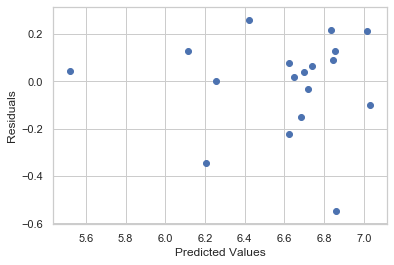

In [31]:
# Lasso Residual Plot
plt.scatter(np.log(prediction_lasso), np.log(y_test) - np.log(prediction_lasso))
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

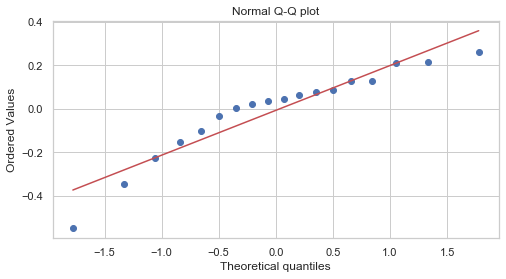

In [32]:
# Lasso Normal Q-Q plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
stats.probplot(np.log(y_test) - np.log(prediction_lasso), dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

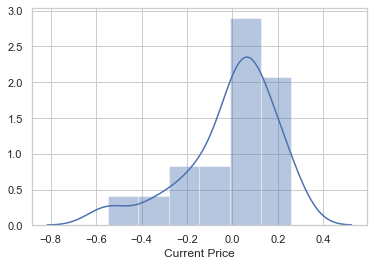

In [33]:
# distplot
sns.distplot(np.log(y_test) - np.log(prediction_lasso))

In [34]:
# # MSE for test data
print("Lasso Test MSE:", mean_squared_error(y_test, prediction_lasso))

# R2 for test data
print(
    "\nLasso Test Accuracy (R-Squared):", r2_score(y_test, prediction_lasso),
)

# cross validation score
cv_score = np.mean(
    (cross_val_score(lasso_regressor, X, y, cv=5, scoring="neg_mean_squared_error"))
    * -1
)
print("\nLasso Cross Validation Score:", cv_score)

Lasso Test MSE: 23228.39737698081

Lasso Test Accuracy (R-Squared): 0.703963553114631


ValueError: Found unknown categories ['Hurulla '] in column 0 during transform

In [35]:
#Random Forcast
# building random forest pipeline
rf_pipe = make_pipeline(
    preprocesser,
    TransformedTargetRegressor(
        regressor=RandomForestRegressor(n_estimators=10),
        func=np.log,
        inverse_func=np.exp,
    ),
)

# fitting the data
rf_pipe.fit(X_train, y_train)

# predicting
rf_predictions = rf_pipe.predict(X_test)

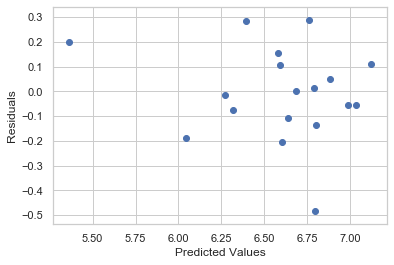

In [36]:
# Random Forest Residual Plot
plt.scatter(np.log(rf_predictions), np.log(y_test) - np.log(rf_predictions))
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

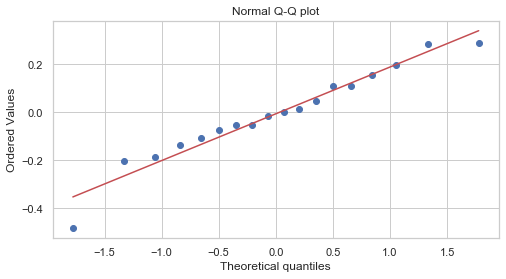

In [37]:
# Random Forest Normal Q-Q plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
stats.probplot(np.log(y_test) - np.log(rf_predictions), dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [38]:
# test MSE
print(f"Random Forest Test MSE: {mean_squared_error(y_test, rf_predictions)}")

# test R2
print(f"Random Forest Test Accuracy: {r2_score(y_test, rf_predictions)}")

# cross validation score
cv_score = np.mean(
    (cross_val_score(rf_pipe, X, y, cv=5, scoring="neg_mean_squared_error")) * -1
)
print(f"Random Forest Cross Validation Score: {cv_score}")

Random Forest Test MSE: 18712.22104872678
Random Forest Test Accuracy: 0.7615203777214394


ValueError: Found unknown categories ['Salaya'] in column 0 during transform

In [39]:
#Selecting Random forcasting method as the final model for this dataset. 
#Lasso model has the smallest CV MSE but the difference with Linear Regression MSE was insignificant. 
#So I decided to go with the simpler LR Model for this dataset.

In [40]:
# fitting the data
rf_pipe.fit(X,y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  ['Fish']),
                                

In [41]:
dump(lr_pipe, "reg_notebook_model.joblib")

['reg_notebook_model.joblib']